# 3. Data Wrangling

Data wrangling, also known as data preprocessing or data cleaning, is a crucial step in time series analysis. It involves manipulating and transforming raw time series data into a structured format that is suitable for analysis. Data wrangling aims to address issues such as missing values, outliers, inconsistent formats, and other anomalies that can affect the quality and reliability of time series analysis results.

Here are some common data wrangling tasks in time series analysis:

1. **Handling missing values**: Time series data often contains missing values, which can occur due to various reasons such as sensor failures, data collection errors, or gaps in the data collection process. Missing values need to be dealt with before analysis. Some approaches to handle missing values include interpolation (e.g., linear interpolation or spline interpolation) or filling missing values with the mean, median, or previous/next observed values.

2. **Dealing with outliers**: Outliers are extreme values that deviate significantly from the normal pattern of the time series. They can be caused by measurement errors or significant events. Outliers can distort analysis results, and therefore, they need to be identified and handled appropriately. Various techniques such as statistical methods (e.g., z-score, median absolute deviation), smoothing methods, or domain knowledge can be employed to identify and handle outliers.

3. **Resampling and aggregation**: Time series data is often collected at irregular intervals or at a higher frequency than needed for analysis. Resampling involves converting the time series to a lower or higher frequency while preserving the data's essential characteristics. Aggregation methods like mean, sum, or maximum can be used to aggregate data into larger time intervals.

4. **Handling inconsistent formats**: Time series data may have inconsistent formats, such as varying date/time formats or inconsistent labeling. It is essential to standardize the format to ensure consistent analysis. This may involve converting date/time strings to a standardized format, renaming variables, or aligning different time series datasets.

5. **Feature engineering**: In time series analysis, additional features or predictors can be derived from the existing time series data to enhance the analysis. This may include creating lagged variables, rolling averages, or other derived features that capture patterns or trends in the data.

6. **Normalization and scaling**: Depending on the analysis techniques and models employed, it may be necessary to normalize or scale the time series data to ensure all variables have similar ranges or distributions. Common normalization techniques include min-max scaling or z-score normalization.

These are some of the key data wrangling tasks involved in time series analysis. Proper data wrangling techniques help ensure the accuracy, quality, and reliability of time series analysis results by addressing data quality issues and preparing the data for further analysis techniques such as forecasting, anomaly detection, or pattern recognition.

## 3.1 handling missing values
In Python, the Pandas library provides powerful tools for handling missing values in DataFrames. Here are some common ways to handle missing values in a Python DataFrame:

1. Dropping Rows or Columns:
   - `df.dropna()`: Drops any rows containing missing values.
   - `df.dropna(axis=1)`: Drops any columns containing missing values.
   - `df.dropna(thresh=n)`: Drops rows that have fewer than n non-null values.
   
2. Filling Missing Values:
   - `df.fillna(value)`: Fills missing values with a specific value.
   - `df.fillna(method='ffill')`: Forward fills missing values with the previous non-null value in the column.
   - `df.fillna(method='bfill')`: Backward fills missing values with the next non-null value in the column.
   - `df.fillna(df.mean())`: Fills missing values with the mean value of the column.
   
3. Interpolation:
   - `df.interpolate()`: Performs linear interpolation to fill missing values based on the column values.
   
4. Replacing Missing Values:
   - `df.replace(to_replace, value)`: Replaces specific values with another value.

5. Indicator Variables:
   - `df.isna()`: Returns a boolean DataFrame indicating the missing values.
   - `df.notna()`: Returns a boolean DataFrame indicating the non-missing values.

6. Customized Handling:
   - You can also define your own custom logic to handle missing values based on your specific requirements.

It's important to analyze the dataset and understand the nature of missing values before selecting an appropriate method for handling them. Different approaches may be suitable depending on the context and the nature of the missing data.

Remember to assign the results of these operations to a new DataFrame or overwrite the existing one to apply the changes permanently.

Here's an example code that demonstrates how to handle missing values in a time series dataset using forward-fill and backward-fill methods:

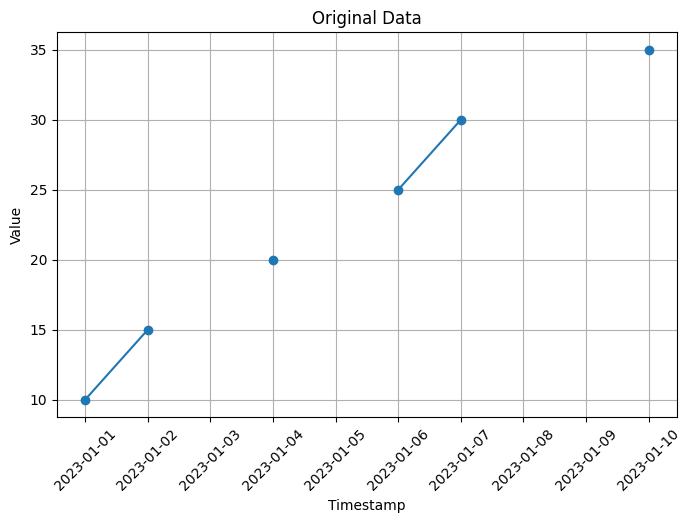

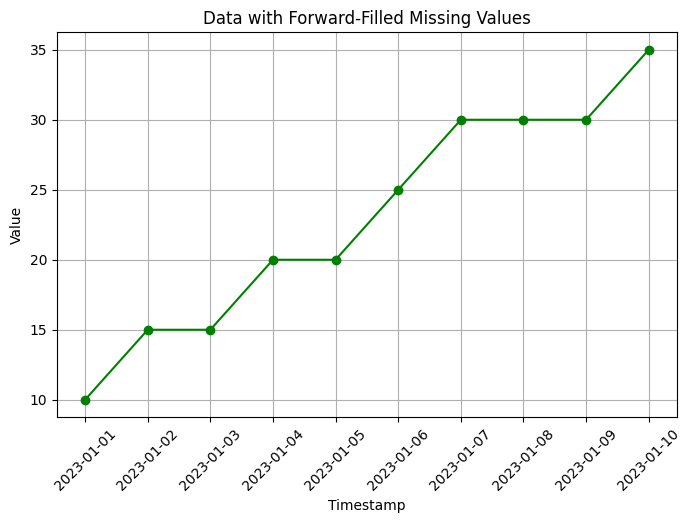

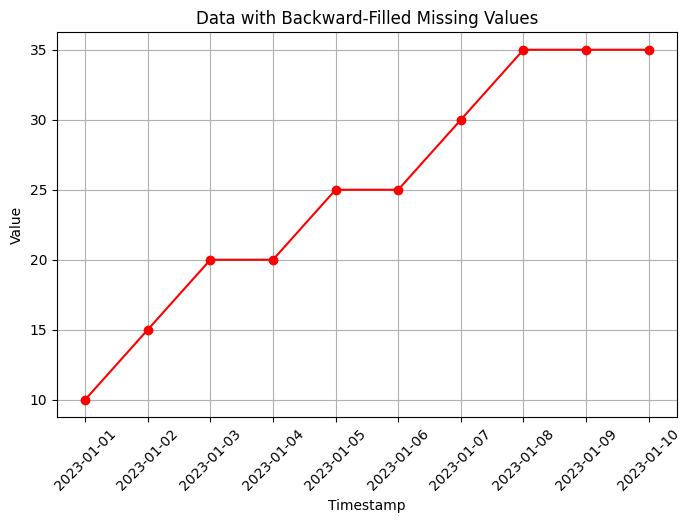

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Example time series data with missing values
data = pd.DataFrame({
    'timestamp': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'value': [10, 15, np.nan, 20, np.nan, 25, 30, np.nan, np.nan, 35]
})

# Visualization of original data
plt.figure(figsize=(8, 5))
plt.plot(data['timestamp'], data['value'], marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Original Data')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

# Forward-fill missing values
data_ffill = data.fillna(method='ffill')

# Visualization of data with forward-filled missing values
plt.figure(figsize=(8, 5))
plt.plot(data_ffill['timestamp'], data_ffill['value'], marker='o', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Data with Forward-Filled Missing Values')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

# Backward-fill missing values
data_bfill = data.fillna(method='bfill')

# Visualization of data with backward-filled missing values
plt.figure(figsize=(8, 5))
plt.plot(data_bfill['timestamp'], data_bfill['value'], marker='o', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Data with Backward-Filled Missing Values')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()




In this code, we create an example time series dataset with some missing values using `np.nan` to represent the missing values. The dataset contains a timestamp column and a value column.

To handle missing values, we use the `fillna()` function from Pandas. In the code, we fill the missing values using two different methods:

1. Forward-fill (`method='ffill'`): This method fills the missing values with the most recent observed value. In the example, the missing values are filled with the previous non-missing value in the column.

2. Backward-fill (`method='bfill'`): This method fills the missing values with the next observed value. In the example, the missing values are filled with the next non-missing value in the column.

After filling the missing values, the code prints the resulting datasets with the filled values.

You can run this code in a Python environment to see the output with the missing values filled using forward-fill and backward-fill methods.



## 3.2 Dealing with outliers
Outliers are data points that deviate significantly from the majority of the observations in a dataset. Outliers can occur due to various reasons, such as measurement errors, data entry mistakes, or rare events. Detecting and handling outliers is an important step in data analysis to ensure accurate and reliable results. Here are some common methods for detecting outliers:

1. Visualizing Data:
   - Box plots: Box plots provide a visual representation of the distribution of data, making it easy to identify potential outliers as individual points outside the whiskers.
   - Scatter plots: Scatter plots can help identify outliers by visualizing the relationship between two variables. Outliers may appear as points that deviate significantly from the general pattern.
   - Histograms: Histograms can reveal the distribution of data, and outliers might be noticeable as data points far from the main cluster.

2. Statistical Methods:
   - Z-Score: The Z-score measures how many standard deviations an observation is away from the mean. Data points with a Z-score greater than a certain threshold (e.g., 2 or 3) can be considered outliers.
   - Modified Z-Score: Similar to the Z-score, but it uses the median and median absolute deviation (MAD) instead of the mean and standard deviation. It is more robust to outliers in the data.
   - Interquartile Range (IQR): The IQR is the range between the 25th and 75th percentiles of the data. Observations below the 25th percentile minus a multiple of the IQR or above the 75th percentile plus a multiple of the IQR can be considered outliers.

3. Machine Learning-Based Approaches:
   - Clustering: Outliers can be identified as data points that do not belong to any cluster or form their own separate clusters.
   - Density-Based Outlier Detection: Algorithms like DBSCAN (Density-Based Spatial Clustering of Applications with Noise) can identify outliers as data points with low density compared to their neighbors.
   - Isolation Forest: This algorithm isolates outliers by constructing random forests and measuring the number of splits required to isolate an observation. Outliers will have shorter paths in the trees.

It's important to note that outlier detection is not an exact science, and the choice of method depends on the specific dataset and domain knowledge. It's often a good practice to combine multiple approaches and carefully consider the context before labeling data points as outliers.
Here's an example code that demonstrates how to identify and handle outliers in a time series dataset using the `z-score` method:

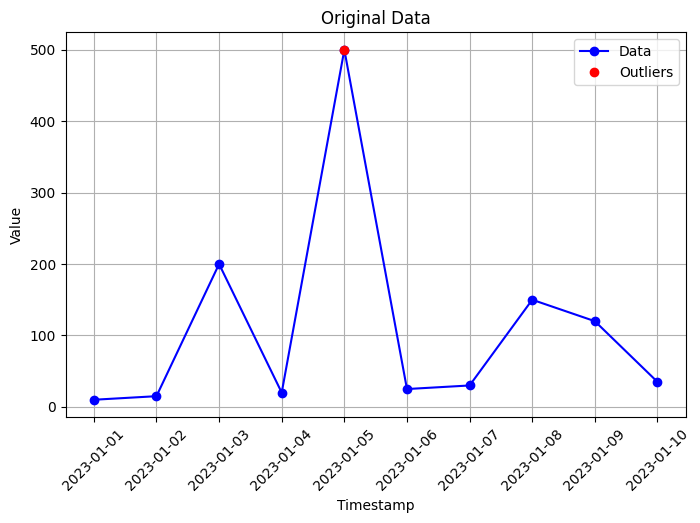

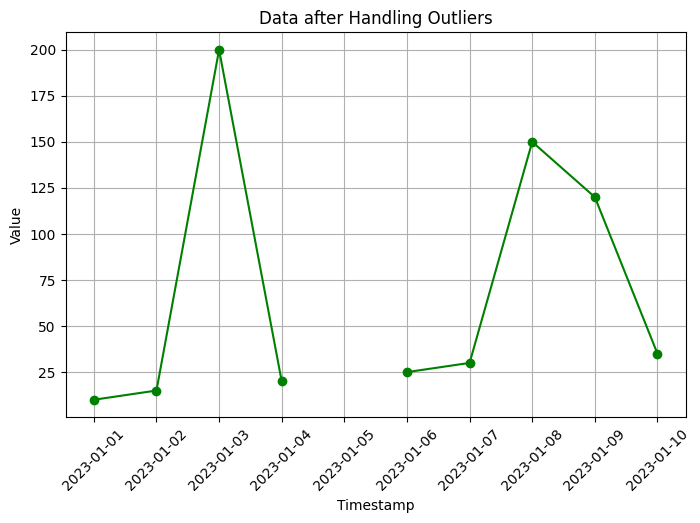

Outliers:
   timestamp  value   z_score
4 2023-01-05    500  2.698929


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Example time series data with outliers
data = pd.DataFrame({
    'timestamp': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'value': [10, 15, 200, 20, 500, 25, 30, 150, 120, 35]
})

# Visualization of original data
plt.figure(figsize=(8, 5))
plt.plot(data['timestamp'], data['value'], marker='o', color='blue', label='Data')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Original Data')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.grid(True)

# Identify outliers using z-score
data['z_score'] = np.abs(zscore(data['value']))
threshold = 2  # Adjust the threshold as needed
outliers = data[data['z_score'] > threshold]

# Highlight outliers with red dots
plt.plot(outliers['timestamp'], outliers['value'], marker='o', color='red', linestyle='none', label='Outliers')

plt.legend()
plt.show()

# Handling outliers by replacing with NaN
data.loc[data['z_score'] > threshold, 'value'] = np.nan

# Visualization of data after handling outliers
plt.figure(figsize=(8, 5))
plt.plot(data['timestamp'], data['value'], marker='o', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Data after Handling Outliers')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

print("Outliers:")
print(outliers)



In this code, we create an example time series dataset with some outliers. We use the z-score method to identify outliers, where we calculate the z-score for each value in the 'value' column. The z-score measures the number of standard deviations a data point is from the mean. We set a threshold value (in this case, 2) to determine which values are considered outliers.

After identifying the outliers, we handle them by replacing the outlier values with NaN (missing values) in the 'value' column. The code then visualizes the data after handling outliers using a line plot.

Additionally, the code prints the identified outliers for reference.

You can run this code in a Python environment to see the original time series data, the identified outliers, and the data after handling the outliers. Adjust the threshold value to suit your specific needs for identifying outliers.


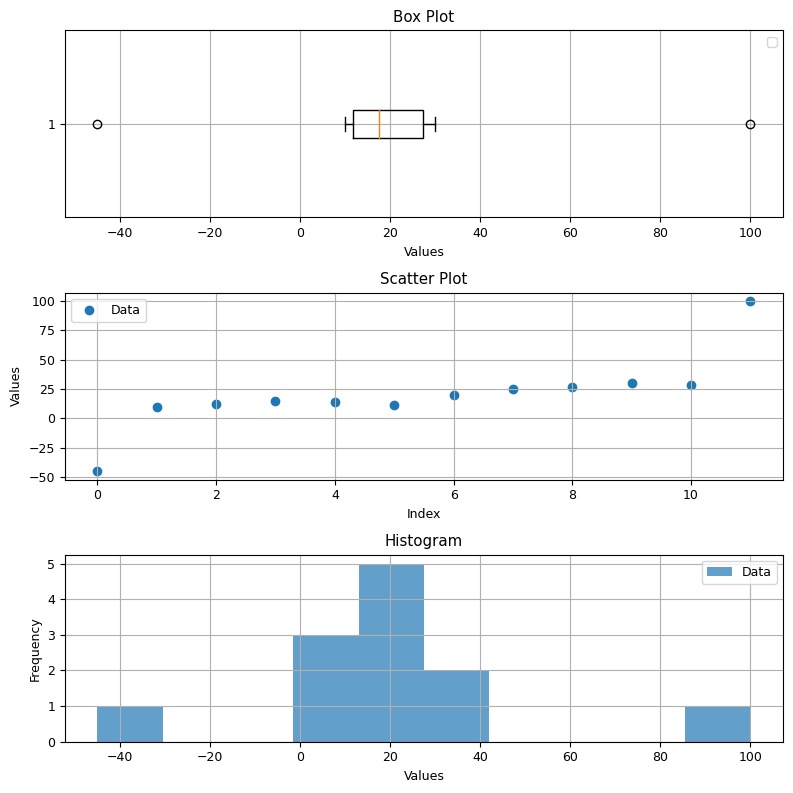

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample DataFrame with outliers
data = {'Values': [-45, 10, 12, 15, 14, 11, 20, 25, 27, 30, 28, 100]}
df = pd.DataFrame(data)

# Calculate Z-scores for each value
z_scores = (df - df.mean()) / df.std()

# Define a threshold for outlier detection
threshold = 2.5

# Identify outliers based on the threshold
outliers = df[abs(z_scores['Values']) > threshold]

# Set font size
plt.rcParams.update({'font.size': 9})

# Visualize the data using box plot, scatter plot, and histogram
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))  # Adjust figure size

# Box plot
axes[0].boxplot(df['Values'], vert=False)
if not outliers.empty:
    axes[0].scatter(outliers.index, outliers['Values'], color='red', marker='o', label='Outliers')
axes[0].set_xlabel('Values')
axes[0].set_title('Box Plot')
axes[0].legend()
axes[0].grid(True)  # Add grid

# Scatter plot
axes[1].scatter(df.index, df['Values'], label='Data')
if not outliers.empty:
    axes[1].scatter(outliers.index, outliers['Values'], color='red', marker='o', label='Outliers')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Values')
axes[1].set_title('Scatter Plot')
axes[1].legend()
axes[1].grid(True)  # Add grid

# Check if there are outliers before plotting the histogram
if not outliers.empty:
    # Histogram for outliers
    axes[2].hist(outliers['Values'], bins=10, alpha=0.7, color='red', label='Outliers')
axes[2].hist(df['Values'], bins=10, alpha=0.7, label='Data')
axes[2].set_xlabel('Values')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram')
axes[2].legend()
axes[2].grid(True)  # Add grid

plt.tight_layout()
plt.show()


## 3.3 Resampling and aggregation
This is an example code that demonstrates how to resample and aggregate a time series dataset to a lower frequency using Pandas:

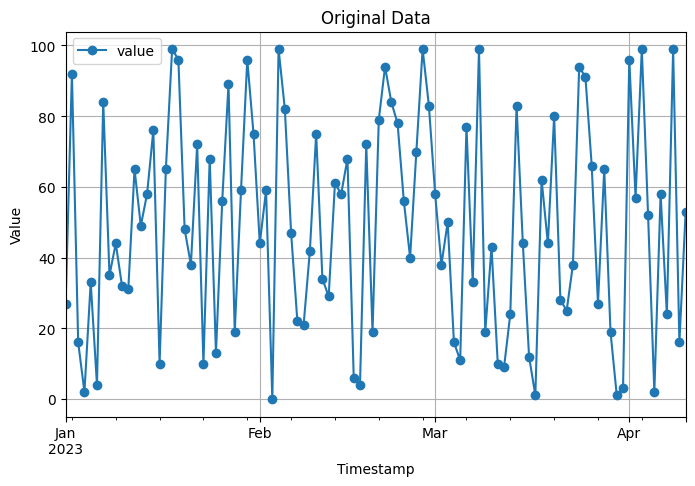

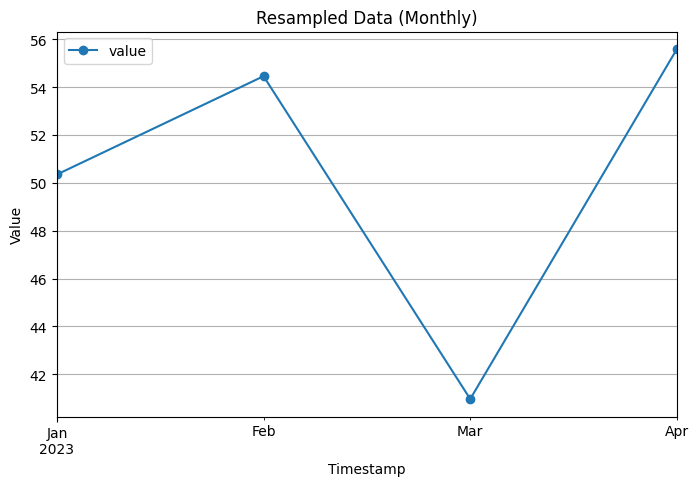

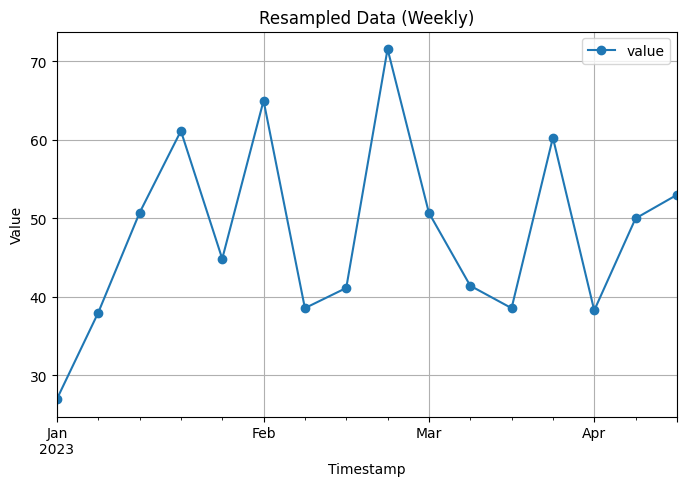

Original Data:
            value
timestamp        
2023-01-01     27
2023-01-02     92
2023-01-03     16
2023-01-04      2
2023-01-05     33
2023-01-06      4
2023-01-07     84
2023-01-08     35
2023-01-09     44
2023-01-10     32

Monthly Resampled Data:
                value
timestamp            
2023-01-31  50.354839
2023-02-28  54.464286
2023-03-31  40.967742
2023-04-30  55.600000

Weekly Resampled Data:
                value
timestamp            
2023-01-01  27.000000
2023-01-08  38.000000
2023-01-15  50.714286
2023-01-22  61.142857
2023-01-29  44.857143
2023-02-05  65.000000
2023-02-12  38.571429
2023-02-19  41.142857
2023-02-26  71.571429
2023-03-05  50.714286


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example time series data
data = pd.DataFrame({
    'timestamp': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'value': np.random.randint(0, 100, size=100)
})

# Resampling and aggregation
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.set_index('timestamp')
resampled_monthly = data.resample('M').mean()  # Resample to monthly frequency and take the mean
resampled_weekly = data.resample('W').mean()  # Resample to weekly frequency and take the mean

# Visualization of original data
data.plot(figsize=(8, 5), marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Original Data')
plt.grid(True)
plt.show()

# Visualization of monthly resampled data
resampled_monthly.plot(figsize=(8, 5), marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Resampled Data (Monthly)')
plt.grid(True)
plt.show()

# Visualization of weekly resampled data
resampled_weekly.plot(figsize=(8, 5), marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Resampled Data (Weekly)')
plt.grid(True)
plt.show()

print("Original Data:")
print(data.head(10))
print("\nMonthly Resampled Data:")
print(resampled_monthly.head(10))
print("\nWeekly Resampled Data:")
print(resampled_weekly.head(10))


In this code, we create an example time series dataset with a daily frequency. The dataset consists of a 'timestamp' column and a 'value' column.

To resample and aggregate the data to a lower frequency, we convert the 'timestamp' column to a datetime format and set it as the index of the DataFrame. We then use the `resample` function to resample the data to a monthly frequency ('M') and take the mean of the values in each monthly interval.

The code includes visualizations of both the original data and the resampled data using line plots with markers.

Finally, the code prints the first 10 rows of the original data and the resampled data for comparison.

You can run this code in a Python environment to see the original time series data, the resampled data, and the printed dataframes. Adjust the resampling frequency and aggregation method according to your specific needs.

## 3.4 Handling inconsistent formats
The below code is an example code that demonstrates how to handle inconsistent date formats in a time series dataset using Pandas:


Raw data:
          date  value
0  2023-01-01     10
1  02/01/2023     15
2  2023-03-01     20
3  04/01/2023     25
4  2023-05-01     30


 Original Data:
        date  value
0 2023-01-01     10
1 2023-01-02     15
2 2023-03-01     20
3 2023-01-04     25
4 2023-05-01     30 



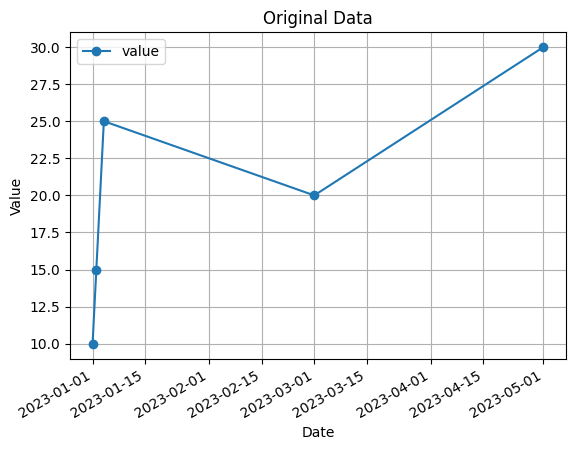

In [ ]:
import pandas as pd

# Example time series data with inconsistent date formats
data = pd.DataFrame({
    'date': ['2023-01-01', '02/01/2023', '2023-03-01', '04/01/2023', '2023-05-01'],
    'value': [10, 15, 20, 25, 30]
})
print(f'Raw data:\n {data}')
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')

print(f'\n\n Original Data:\n{data} \n')


# Visualization of original data
data.plot(x='date', y='value', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data')
plt.grid(True)
plt.show()



In this code, we have an example time series dataset with inconsistent date formats in the 'date' column. The formats used are 'YYYY-MM-DD' and 'DD/MM/YYYY'.

To handle the inconsistent date formats, we use the `pd.to_datetime` function from Pandas. By passing the `dayfirst=True` parameter, we specify that the day should come before the month in the 'DD/MM/YYYY' format. The `errors='coerce'` parameter is used to convert any invalid dates to `NaT` (Not a Time) value.

The code also includes a visualization of the original data using a line plot with markers.

Finally, the code prints the original data, including the 'date' column converted to the datetime format.

You can run this code in a Python environment to see the original time series data, the converted datetime format, and the printed dataframe. Adjust the date formats and conversion parameters (`dayfirst`, `errors`) according to your specific needs.

## 3.5 Feature engineering

the below code is an example code that demonstrates some common feature engineering techniques on a time series dataset:

original data:
   timestamp  value
0 2023-01-01     10
1 2023-01-02     15
2 2023-01-03     20
3 2023-01-04     25
4 2023-01-05     30

 Data with Engineered Features::
   timestamp  value  year  month  day  weekday  weekend  lag_1  lag_2  \
0 2023-01-01     10  2023      1    1        6        1    NaN    NaN   
1 2023-01-02     15  2023      1    2        0        0   10.0    NaN   
2 2023-01-03     20  2023      1    3        1        0   15.0   10.0   
3 2023-01-04     25  2023      1    4        2        0   20.0   15.0   
4 2023-01-05     30  2023      1    5        3        0   25.0   20.0   

   rolling_mean_3  
0             NaN  
1             NaN  
2            15.0  
3            20.0  
4            25.0  


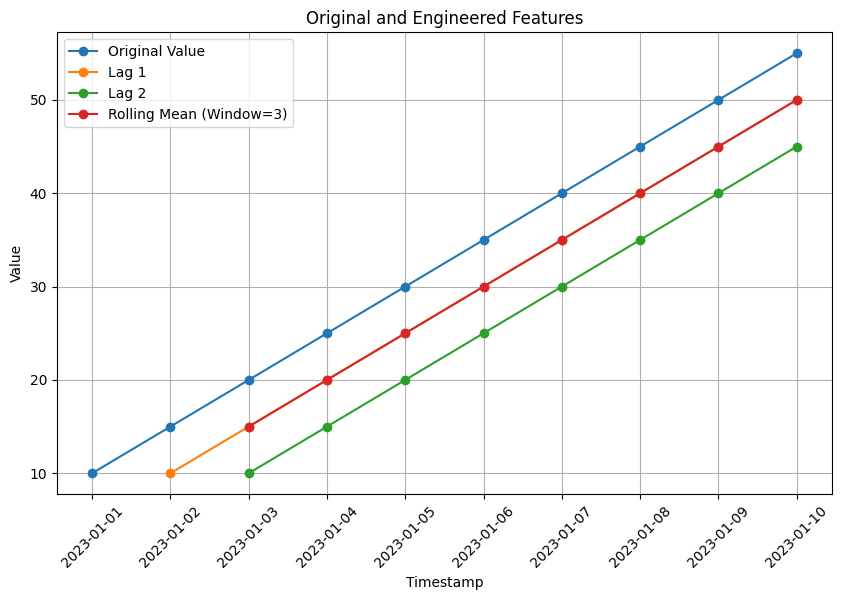

In [ ]:
import pandas as pd
import numpy as np

# Example time series data
data = pd.DataFrame({
    'timestamp': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'value': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
})
print(f'original data:\n{data.head(5)}')


# Create additional features
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['weekday'] = data['timestamp'].dt.weekday
data['weekend'] = np.where(data['weekday'] < 5, 0, 1)

# Compute lag features
data['lag_1'] = data['value'].shift(1)
data['lag_2'] = data['value'].shift(2)
data['rolling_mean_3'] = data['value'].rolling(window=3).mean()


print(f'\n Data with Engineered Features::\n{data.head(5)}')

# Visualization of original and engineered features
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['value'], marker='o', label='Original Value')
plt.plot(data['timestamp'], data['lag_1'], marker='o', label='Lag 1')
plt.plot(data['timestamp'], data['lag_2'], marker='o', label='Lag 2')
plt.plot(data['timestamp'], data['rolling_mean_3'], marker='o', label='Rolling Mean (Window=3)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Original and Engineered Features')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


## 3.6 Lag Plots
A **Lag plot** is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

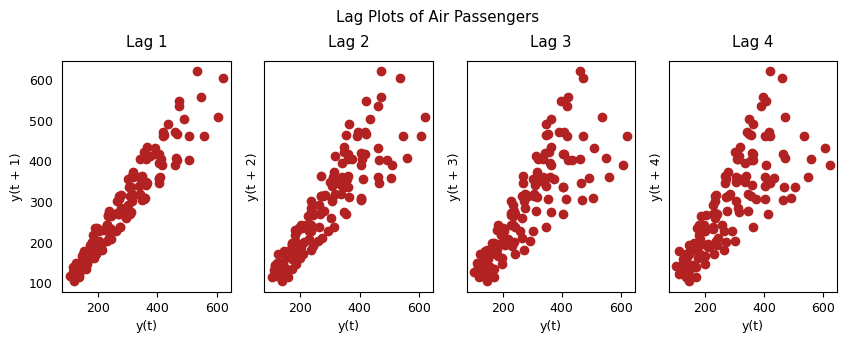

In [ ]:
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Extract the passenger counts as the data
data = df['Passengers']

plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)
plt.show()



In this code, we start with an example time series dataset containing a 'timestamp' column and a 'value' column.

We perform the following feature engineering techniques:

1. Create additional features:
   - Extract the 'year', 'month', 'day', 'weekday' from the 'timestamp' column using Pandas datetime properties.
   - Create a 'weekend' feature to indicate if a day is a weekend or weekday (0 for weekdays, 1 for weekends).

2. Compute lag features:
   - Create lag features by shifting the 'value' column by a specified number of time periods. In this example, we create 'lag_1' and 'lag_2' by shifting the 'value' column by 1 and 2 time periods, respectively.
   - Compute the rolling mean feature 'rolling_mean_3' by taking the mean of the 'value' column over a rolling window of size 3.

The code also includes a visualization of the original 'value' column along with the engineered features.

Finally, the code prints the data with the engineered features for reference.

You can run this code in a Python environment to see the original time series data, the engineered features, and the printed dataframe. Feel free to modify the feature engineering techniques according to your specific requirements.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create example input data
data = {'Timestamp': pd.date_range('2023-01-01', periods=10, freq='D'),
        'Variable': [1, 3, 5, 2, 4, 6, 8, 7, 9, 10]}
df = pd.DataFrame(data)

# Create lagged variables
lag_1 = df['Variable'].shift(1)
lag_2 = df['Variable'].shift(2)
df['Lag_1'] = lag_1
df['Lag_2'] = lag_2

# Visualize the results
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df['Timestamp'], df['Variable'], label='Variable')
ax.plot(df['Timestamp'], df['Lag_1'], label='Lag 1')
ax.plot(df['Timestamp'], df['Lag_2'], label='Lag 2')

# Format x-axis labels
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_formatter(plt.FixedFormatter(df['Timestamp'].dt.strftime('%Y-%m-%d')))
plt.xticks(rotation=45)

ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.legend()

plt.tight_layout()
plt.show()


## 3.7 Normalization and scaling
In time series analysis, scaling refers to the process of transforming the data so that it has a common scale or range. This can be useful in many ways, such as reducing the impact of outliers, improving the accuracy of statistical models, and making the data easier to visualize.












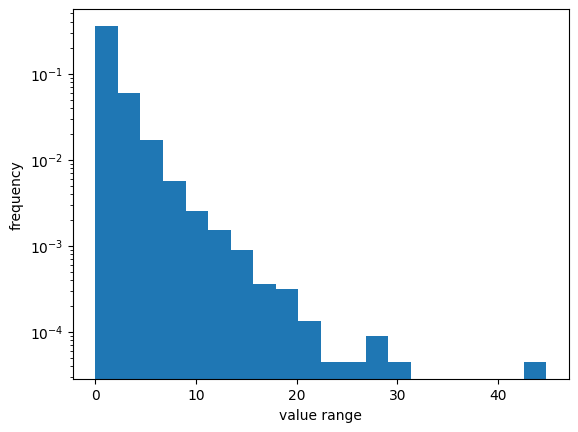

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
pts = 10000
vals = np.random.lognormal(0, 1.0, pts)

plt.hist(vals, bins=20, density=True)
plt.yscale("log")
plt.ylabel("frequency")
plt.xlabel("value range");

There are several methods for scaling time series data, including:

* **Min-max scaling**: This method scales the data to a range between 0 and 1. It is calculated by subtracting the minimum value from each observation and dividing by the range (i.e., the difference between the maximum and minimum values).

  $X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$

In [ ]:
!pip install sklearn

significance: 0.00
significance: 0.00


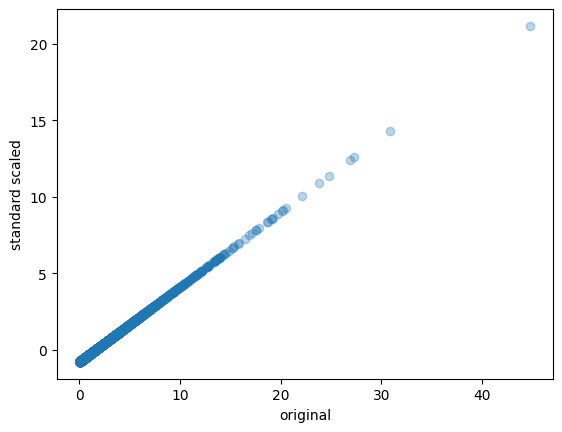

In [ ]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest

vals_mm = minmax_scale(vals)
scaler = StandardScaler()
vals_ss = scaler.fit_transform(vals.reshape(-1, 1))
_, p = normaltest(vals_ss.squeeze())
print(f"significance: {p:.2f}")

# In this statistical test, the null hypothesis assumes
# that the sample is drawn from a normal distribution.
_, p = normaltest(vals_mm.squeeze())
print(f"significance: {p:.2f}")

# plt.hist(vals_ss, bins=20, density=True)
# plt.yscale("log")
# plt.ylabel("frequency")
# plt.xlabel("value range");


plt.scatter(vals, vals_ss, alpha=0.3)
plt.ylabel("standard scaled")
plt.xlabel("original");

* **Standardization(Z-score normalization)**: This method scales the data to have a mean of 0 and a standard deviation of 1. It is calculated by subtracting the mean from each observation and dividing by the standard deviation.

  $z = \frac{x-\mu}{\sigma}$

* **Log transformation**: This method transforms the data by taking the logarithm of each observation. This can be useful when the data has a skewed distribution.Perhaps one of the most widely used types of transformations for bringing data distributions closer to a Gaussian distribution is the log transformation.

  $y = k * log(x + c)$

  (`k` is a scaling factor, and `c` is a constant offset.)

In [ ]:
from statsmodels.stats.diagnostic import *

log_transformed = np.log(vals)
_, p = kstest_normal(log_transformed)  # stats.normaltest
print(f"significance: {p:.2f}")



significance: 0.31


In [ ]:
np.std(log_transformed)

0.9875565681761207

In [ ]:
np.mean(log_transformed)

-0.01843372015826582

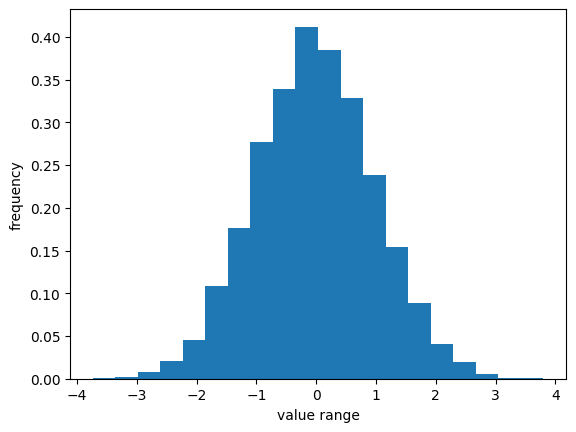

In [ ]:
plt.hist(log_transformed, bins=20, density=True)
#plt.yscale("log")
plt.ylabel("frequency")
plt.xlabel("value range");

* **Box-Cox transformation**: This is a more general transformation that can be used to transform the data to have a normal distribution. It is a family of power transformations that includes the log transformation as a special case.

  $
\begin{equation}
y(\lambda)=\begin{cases}
\dfrac{y^{\lambda}-1}{\lambda}, & \text{if } \lambda\neq 0\ \newline
\ln(y), & \text{if } \lambda=0
\end{cases}
\end{equation}
$

  In this equation, $y$ is the original data, and $\lambda$ is the Box-Cox transformation parameter. The transformation is used to make the data more normally distributed and improve the performance of statistical models.



In [ ]:
from scipy.stats import boxcox
vals_bc = boxcox(vals, 0.0)
_, p = normaltest(vals_bc)
print(f"significance: {p:.2f}")

significance: 0.46


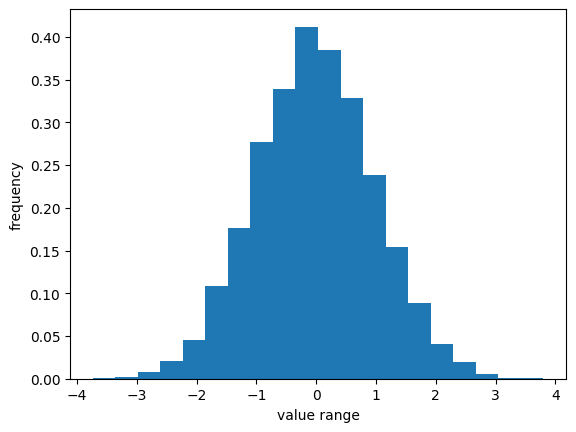

In [ ]:
plt.hist(vals_bc, bins=20, density=True)
plt.ylabel("frequency")
plt.xlabel("value range");

The choice of scaling method depends on the specific characteristics of the data and the goals of the analysis. It is important to keep in mind that scaling should be done carefully, as it can sometimes lead to loss of information or introduce bias in the analysis.